In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import missingno as msno

# Import Data

In [120]:
# Import Dataset that has processed in phase two 
df = pd.read_csv('Lending Club Updated Version_2.csv')

In [121]:
df.shape 

(107864, 80)

In [122]:
df.describe() 

,loan_amnt,int_rate,annual_inc,dti,delinq_2yrs,fico_range_low,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,...,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,loan_status_1
count,107864.000000,107864.000000,1.078640e+05,107602.000000,107864.000000,107864.000000,107864.000000,47169.000000,15269.000000,107864.000000,...,16331.000000,16331.000000,16331.000000,16021.000000,16331.000000,16331.000000,16331.000000,16331.000000,5427.000000,107864.000000
mean,16147.942780,12.423171,7.854227e+04,19.648209,0.223773,708.248303,0.461266,36.980008,79.156657,11.377151,...,0.647174,1.550915,11.624150,58.675382,3.011573,12.770375,0.057314,0.080583,35.498987,0.145127
std,10184.024938,5.004180,7.687436e+04,21.795902,0.730417,37.205453,0.746153,21.802486,24.817082,5.879388,...,1.021778,1.788622,6.665203,25.927238,3.248730,8.287120,0.455782,0.437520,23.915029,0.352231
min,1000.000000,5.310000,0.000000e+00,0.000000,0.000000,660.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8000.000000,9.430000,4.500000e+04,11.230000,0.000000,680.000000,0.000000,19.000000,64.000000,7.000000,...,0.000000,0.000000,7.000000,39.800000,1.000000,7.000000,0.000000,0.000000,14.000000,0.000000
50%,14000.000000,11.980000,6.500000e+04,17.670000,0.000000,700.000000,0.000000,34.000000,83.000000,10.000000,...,0.000000,1.000000,11.000000,60.700000,2.000000,11.000000,0.000000,0.000000,34.000000,0.000000
75%,22400.000000,15.050000,9.500000e+04,25.020000,0.000000,730.000000,1.000000,53.000000,98.000000,14.000000,...,1.000000,3.000000,15.000000,79.200000,4.000000,17.000000,0.000000,0.000000,55.000000,0.000000
max,40000.000000,30.990000,8.365188e+06,999.000000,20.000000,845.000000,5.000000,226.000000,124.000000,69.000000,...,6.000000,27.000000,66.000000,434.300000,34.000000,85.000000,17.000000,15.000000,131.000000,1.000000


# Deal with Missing Value 

<AxesSubplot:>

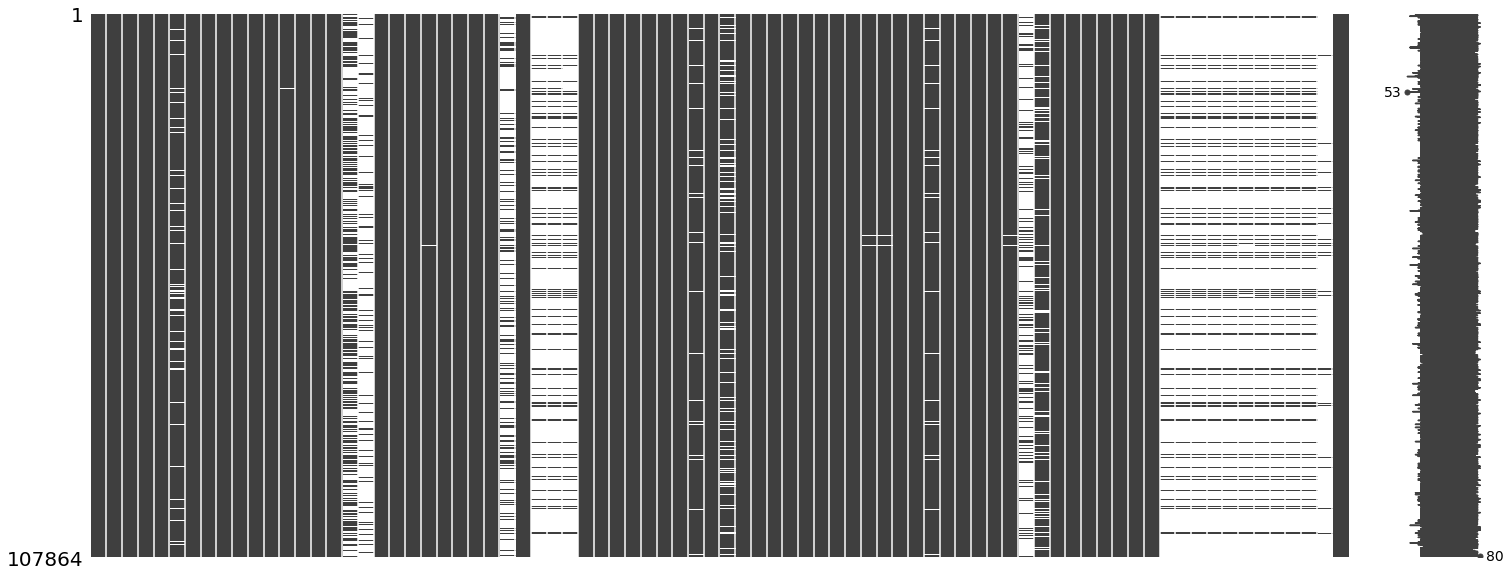

In [123]:
msno.matrix(df) 

In [124]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
        "columns that have missing values.")
        return mis_val_table_ren_columns

missing_table = missing_values_table(df)
missing_table

Your selected dataframe has 80 columns.
There are 30columns that have missing values.


,Missing Values,% of Total Values
sec_app_mths_since_last_major_derog,102437,95.0
mths_since_last_record,92595,85.8
verification_status_joint,91847,85.2
sec_app_revol_util,91843,85.1
sec_app_fico_range_low,91533,84.9
sec_app_inq_last_6mths,91533,84.9
sec_app_mort_acc,91533,84.9
sec_app_open_acc,91533,84.9
sec_app_open_act_il,91533,84.9
sec_app_num_rev_accts,91533,84.9


In [26]:
# sec_app_mths_since_last_major_derog: Months since most recent 90-day or worse rating at time of application for the secondary applicant
df['sec_app_mths_since_last_major_derog'].value_counts(dropna=False)

NaN      102437
1.0         207
2.0         116
12.0        104
13.0        101
          ...  
102.0         1
109.0         1
87.0          1
110.0         1
108.0         1
Name: sec_app_mths_since_last_major_derog, Length: 111, dtype: int64

In [32]:
# check if there is 0 appearing on sec_app_mths_since_last_major_derog, if not, it means that the missing value may 
# stand for the people do not have any record of Derogatory. However, the result shows that there are 76 loans with zero derogatory record. 

df[df['sec_app_mths_since_last_major_derog']==0]

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,loan_status,...,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,loan_status_1
230,25000.0,60 months,15.04,C,C4,NaN,OWN,50000.0,Not Verified,Fully Paid,...,0.0,1.0,30.0,81.8,5.0,31.0,0.0,1.0,0.0,0
575,5500.0,36 months,13.58,C,C2,10+ years,RENT,51000.0,Not Verified,Charged Off,...,2.0,0.0,7.0,82.3,3.0,10.0,0.0,1.0,0.0,1
904,8000.0,36 months,15.04,C,C4,2 years,RENT,23000.0,Verified,Fully Paid,...,0.0,0.0,2.0,87.4,1.0,1.0,0.0,2.0,0.0,0
1876,12000.0,36 months,22.90,E,E1,< 1 year,OWN,20000.0,Not Verified,Fully Paid,...,2.0,0.0,11.0,64.0,4.0,11.0,0.0,0.0,0.0,0
3137,30000.0,60 months,26.77,E,E5,4 years,MORTGAGE,58000.0,Not Verified,Current,...,1.0,1.0,10.0,93.7,3.0,10.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104450,25000.0,60 months,12.62,C,C1,10+ years,MORTGAGE,57000.0,Not Verified,Current,...,0.0,1.0,7.0,91.9,3.0,6.0,1.0,1.0,0.0,0
105298,12000.0,36 months,9.44,B,B1,10+ years,MORTGAGE,70000.0,Verified,Charged Off,...,0.0,0.0,15.0,143.2,14.0,2.0,0.0,0.0,0.0,1
105477,8000.0,36 months,6.72,A,A3,10+ years,MORTGAGE,70000.0,Not Verified,Fully Paid,...,0.0,2.0,13.0,49.6,4.0,12.0,0.0,0.0,0.0,0
107475,10000.0,60 months,18.06,D,D2,NaN,MORTGAGE,26845.0,Not Verified,Charged Off,...,0.0,0.0,16.0,82.6,0.0,22.0,3.0,0.0,0.0,1


In [125]:
# Therefore, it is reasonable to drop this variable due to randomly miss. 
df.drop(columns=['sec_app_mths_since_last_major_derog'],inplace=True)

In [126]:
# mths_since_last_record
df['mths_since_last_record'].value_counts(dropna=False, normalize=True,ascending=False)

NaN      0.858442
94.0     0.002772
82.0     0.002744
92.0     0.002503
84.0     0.002503
           ...   
121.0    0.000037
1.0      0.000028
2.0      0.000019
124.0    0.000019
122.0    0.000009
Name: mths_since_last_record, Length: 125, dtype: float64

In [127]:
df['verification_status_joint'].value_counts(dropna=False,normalize=True)

NaN                0.851507
Not Verified       0.067817
Source Verified    0.047819
Verified           0.032856
Name: verification_status_joint, dtype: float64

In [128]:
df['verification_status_joint'] = df['verification_status_joint'].fillna(value='other')

In [129]:
df['verification_status_joint'].value_counts(dropna=False,normalize=True)

other              0.851507
Not Verified       0.067817
Source Verified    0.047819
Verified           0.032856
Name: verification_status_joint, dtype: float64

In [130]:
# There is loan with 0 and it could be reasonably assunped that all the missing value could be filled as 0
[df['mths_since_last_record']==0]

[0         False
 1         False
 2         False
 3         False
 4         False
           ...  
 107859    False
 107860    False
 107861    False
 107862    False
 107863    False
 Name: mths_since_last_record, Length: 107864, dtype: bool]

In [131]:
# From reading carefully about the Lending Club Data Dictionary, the following variables could be filled as 0.
miss_cols =['mths_since_last_record','sec_app_revol_util','sec_app_inq_last_6mths','revol_bal_joint','sec_app_mort_acc','sec_app_open_acc','sec_app_open_act_il',
   'sec_app_num_rev_accts','sec_app_chargeoff_within_12_mths','sec_app_collections_12_mths_ex_med','dti_joint','annual_inc_joint','sec_app_fico_range_low',
   'mths_since_recent_bc_dlq','mths_since_last_major_derog','mths_since_last_delinq']
for col in miss_cols:
    df[col].fillna(0,inplace=True)

In [132]:
# Now there are still some of columns filling with missing value 
missing_table = missing_values_table(df)
missing_table

Your selected dataframe has 79 columns.
There are 12columns that have missing values.


,Missing Values,% of Total Values
il_util,17984,16.7
mths_since_recent_inq,13648,12.7
emp_length,9428,8.7
mths_since_rcnt_il,4288,4.0
mo_sin_old_il_acct,4288,4.0
bc_util,1561,1.4
bc_open_to_buy,1510,1.4
mths_since_recent_bc,1421,1.3
dti,262,0.2
revol_util,149,0.1


In [133]:
# All the missing value of other varilables are filled with median, but not emp_lenght. 

In [134]:
miss_cols = ['il_util','mths_since_recent_inq','mths_since_rcnt_il','mo_sin_old_il_acct','bc_util','bc_open_to_buy','mths_since_recent_bc',
            'dti','all_util','pct_tl_nvr_dlq','revol_util']
for col in miss_cols:
    df[col].fillna(df[col].median(),inplace=True)


In [135]:
df['emp_length'].value_counts(dropna=False)

10+ years    35706
2 years      10191
NaN           9428
3 years       9179
< 1 year      7339
1 year        7169
4 years       6918
5 years       6815
6 years       4716
7 years       4002
8 years       3278
9 years       3123
Name: emp_length, dtype: int64

In [136]:
# Replace missing values with the most common class
df['emp_length'] = df[['emp_length']].apply(lambda x:x.fillna(x.value_counts().index[0]))

In [137]:
df['emp_length'].value_counts(dropna=False)

10+ years    45134
2 years      10191
3 years       9179
< 1 year      7339
1 year        7169
4 years       6918
5 years       6815
6 years       4716
7 years       4002
8 years       3278
9 years       3123
Name: emp_length, dtype: int64

In [138]:
# Now there is no missing value in the dataset anymore. 
missing_table = missing_values_table(df)
missing_table

Your selected dataframe has 79 columns.
There are 0columns that have missing values.


,Missing Values,% of Total Values


# Numerical variable transformation 
Conduct transformation for some variables with some extreme outliers

## Log Transformation  

According to the analysis result in phase two, we know that the distribution of these two numerical variables, dti and annual_inc,are rather right skew.  

In [139]:
from sklearn.preprocessing import PowerTransformer

In [140]:
pow_trans = PowerTransformer()
pow_trans.fit(df[['dti']])
df['dti_log'] = pow_trans.transform(df[['dti']])

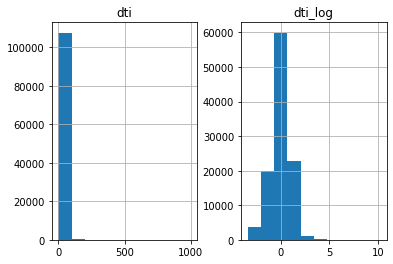

In [141]:
# plot the data before and after the transformation, and we could clearly know that the dti become more normal after log transformation
df[['dti','dti_log']].hist()
plt.show()

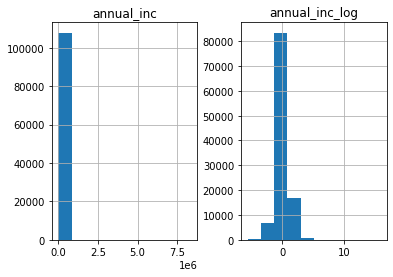

In [142]:
# The below histogram shows that the distrannual_inc 
pow_trans.fit(df[['annual_inc']])
df['annual_inc_log'] = pow_trans.transform(df[['annual_inc']])
df[['annual_inc','annual_inc_log']].hist()
plt.show()

In [143]:
df.drop(columns=['annual_inc','dti'],inplace=True)

# Categorical variable transformation 

In [149]:
cat_variables = list(df.select_dtypes(include=['object']).columns)

In [150]:
cat_variables

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'title',
 'initial_list_status',
 'application_type',
 'verification_status_joint']

In [151]:
# Understand the categorical columns and their associated 
vn = pd.DataFrame(df[cat_variables].nunique()).reset_index()
vn.columns = ['VarName', 'LevelsCount']
vn = vn.sort_values(by='LevelsCount',ascending= False)
vn

,VarName,LevelsCount
2,sub_grade,35
6,purpose,13
7,title,12
3,emp_length,11
1,grade,7
4,home_ownership,4
10,verification_status_joint,4
5,verification_status,3
0,term,2
8,initial_list_status,2


In [ ]:
# In phase two,conducting bivariate analysis between default_rate and address_state there is no any pattern in these two variables, so 'add_state' could be drop.
df.drop(columns= 'addr_state', inplace=True)

In [153]:
# In phase two, when explore the default_rate Vs grade and default_rate vs sub_grade, they show the similar patter in the plot, 
# so it's reasonble to drop sub_grade 
df['sub_grade'].unique()

array(['C2', 'A1', 'B5', 'B2', 'D4', 'C5', 'D1', 'C4', 'E3', 'D5', 'A3',
       'A4', 'B1', 'B4', 'B3', 'E2', 'C3', 'D2', 'C1', 'G1', 'A5', 'E4',
       'A2', 'D3', 'E5', 'F4', 'F1', 'E1', 'F2', 'F3', 'F5', 'G4', 'G2',
       'G5', 'G3'], dtype=object)

In [154]:
df.drop(columns='sub_grade',inplace=True)

In [155]:
# When it comes to verification_status_joint and verification_status, these variables also shows the same pattern interacting with default rate
# so verification_status_joint is dropped
df.drop(columns='verification_status_joint',inplace=True)

In [158]:
list(vn['VarName'])

['sub_grade',
 'purpose',
 'title',
 'emp_length',
 'grade',
 'home_ownership',
 'verification_status_joint',
 'verification_status',
 'term',
 'initial_list_status',
 'application_type']

In [159]:
# get dummy for the categorical variables

In [161]:
df = pd.get_dummies(df, columns=['purpose', 'title', 'emp_length', 'grade', 'home_ownership', 'verification_status', 'term','initial_list_status', 'application_type'])

In [162]:
df.shape

(107864, 123)

# Save the processed dataset

In [163]:
df.to_csv(r'D:\Springboard\Github\Lending Club Capstone Project\Lending Club Updated Version_3.csv',index=False)